
<center>
    <h1> INF391 - Reconocimiento de Patrones en Minería de Datos  </h1>
    <h2> Tarea 1 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Abril 2017_
<p>Profesor: Marcelo Mendoza</p>
 <p>Ayudante: Ignacio Espinoza</p>
 <p>Integrantes: 
 
 <br>Fernando Llorens, 201373528-2</br>
 
 <br>Margarita Bugueño, 201373510-k</br>

 <br>Alfredo Silva,
 201373511-8</br>
</p>

<strong style="font-size:18px">Introduccion y presentación del Dataset:</strong>
<p style="font-size:16px">A partir del dataset *beer_reviews.csv* proporcionado por el sitio web BeerAdvocate, el cual consiste en una colección de reseñas de cervezas en cuanto a diferentes aspectos de estas, se analizarán los resultados de la aplicación de cinco algoritmos de clustering vistos en clase y sus respectivas visualizaciones en dos dimensiones.
</p> 
<p style="font-size:16px">Los trece columnas a utilizar corresponden a: brewery_id, brewery_name, review_time, review_overall, review_aroma, review_appearance, review_profilename, beer_style, review_palate, review_taste,beer_name, beer_abv, beer_beerid.</p>
<p style="font-size:16px">De estas, 9 columnas corresponden a datos de tipo *int/float* y 4 de tipo *string*. Para la primera parte del estudio solo se utilizaran las siguientes columnas: review_overall, review_aroma, review_appearance, review_palate, review_taste .
Existen alrededor de 1.500.000 entradas disponibles para el estudio, de las cuales, se hará una muestra de tamaño 6000 para evitar problemas de memoria y tiempo al ejecutar los algoritmos de *clustering* especificados.
</p>


<strong style="font-size:18px">Lectura del dataset:</strong>
<p style="font-size:16px">Haciendo uso de la libreria Pandas se almacenó la información del archivo "beer_reviews.csv" en una matriz, la cual se recorrio de manera aleatorea hasta obtener 
</p>

In [1]:
#0,brewery_id
#1,brewery_name
#2,review_time
#3,review_overall
#4,review_aroma
#5,review_appearance
#6,review_profilename
#7,beer_style
#8,review_palate
#9,review_taste
#10,beer_name
#11,beer_abv
#12,beer_beerid

import pandas as pd
import random

csv = pd.read_csv("beer_reviews.csv",error_bad_lines=False,warn_bad_lines=False).as_matrix()
todo=[]
for cerveza_review in csv:
    todo.append([cerveza_review[1],cerveza_review[2],cerveza_review[3]
                  ,cerveza_review[4],cerveza_review[5],cerveza_review[6]
                  ,cerveza_review[8],cerveza_review[9],cerveza_review[10]
                  ,cerveza_review[11],cerveza_review[7]])

random.seed(33)
lista=[]
cnt=0
posicionesUtilizadas= set()
while(cnt<6000):
    posicion=random.randint(0, len(lista))
    if(posicion not in posicionesUtilizadas):
        lista.append(todo[posicion])
        posicionesUtilizadas.add(posicion)
        cnt+=1




In [3]:
cervecerias = []
tipos = []
nombres= []
for list in lista:
    cervecerias.append(list[0])
    tipos.append(list[10])
    nombres.append(list[8])

#Labels reales de Nombres de cerveceria
conj= set(cervecerias)
list_cerveza= []
for cerveza in conj:
    list_cerveza.append(cerveza)

l_true_cervecerias= []
for cerveza in cervecerias:
    l_true_cervecerias.append(list_cerveza.index(cerveza))

In [4]:
#Labels reales de Tipos de cerveceria
conj= set(tipos)
list_tipo= []
for tipo in conj:
    list_tipo.append(tipo)
    
l_true_tipos= []
for tipo in tipos:
    l_true_tipos.append(list_tipo.index(tipo))

In [18]:
#Labels reales de Profilename
conj= set(nombres)
list_nombre= []
for nombre in conj:
    list_nombre.append(nombre)
    
l_true_nombres= []
for nombre in nombres:
    l_true_nombres.append(list_nombre.index(nombre))
    

<strong style="font-size:18px">Reducción dimencional:</strong>
<p style="font-size:16px">
Se aplicará una reducción dimencional a las cinco columnas mencionadas con anterioridad haciendo uso de PCA (análisis de componentes principales) algoritmo que utiliza el cálculo de la descomposición en autovalores de la matriz de covarianza, normalmente tras centrar los datos en la media de cada atributo. Técnicamente, el PCA busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. 
</p>
<p style="font-size:16px">
Luego de esto se procederá a generar el gráfico de dispersión para el conjunto de todas las entradas y para el conjunto de muestra.
</p>

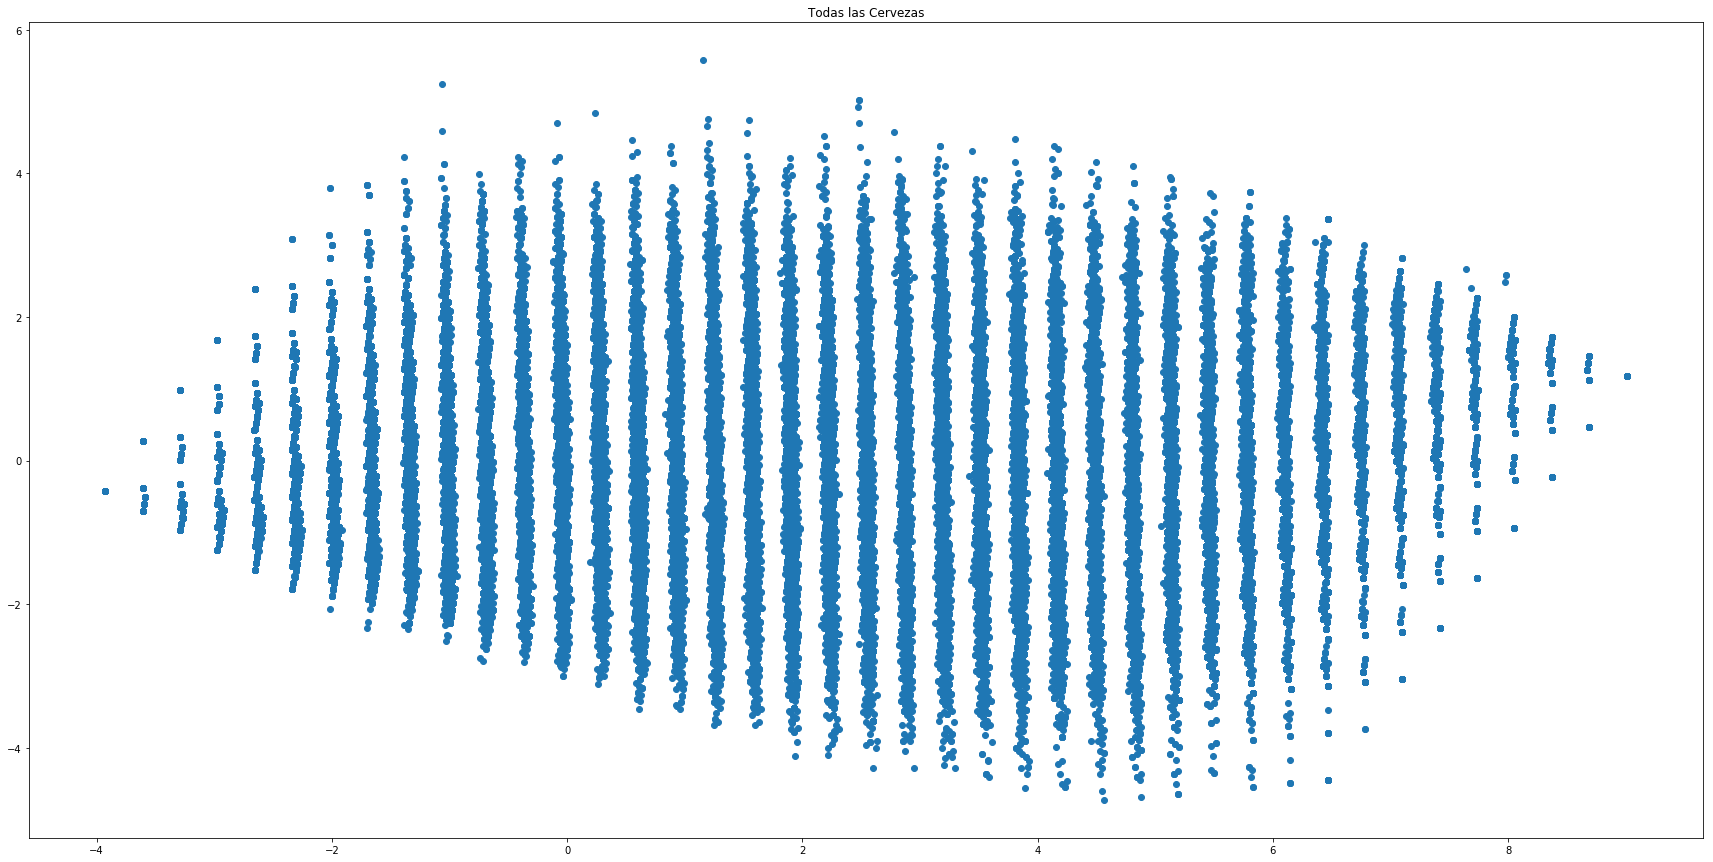

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
todas_las_cervezas=[]
#0,review_overall
#1,review_aroma
#2,review_appearance
#3,review_palate
#4,review_taste

for beer in todo:
    todas_las_cervezas.append([beer[2],beer[3],beer[4],beer[6],beer[7]])

scaledAllBeer = StandardScaler().fit_transform(todas_las_cervezas)
pca = PCA(n_components=2)
pca.fit(scaledAllBeer)
scaledAllBeer2D = pca.transform(scaledAllBeer)

plt.figure(figsize=(30,15))
plt.scatter(scaledAllBeer2D[:,0], scaledAllBeer2D[:,1])
plt.title('Todas las Cervezas')
plt.show()

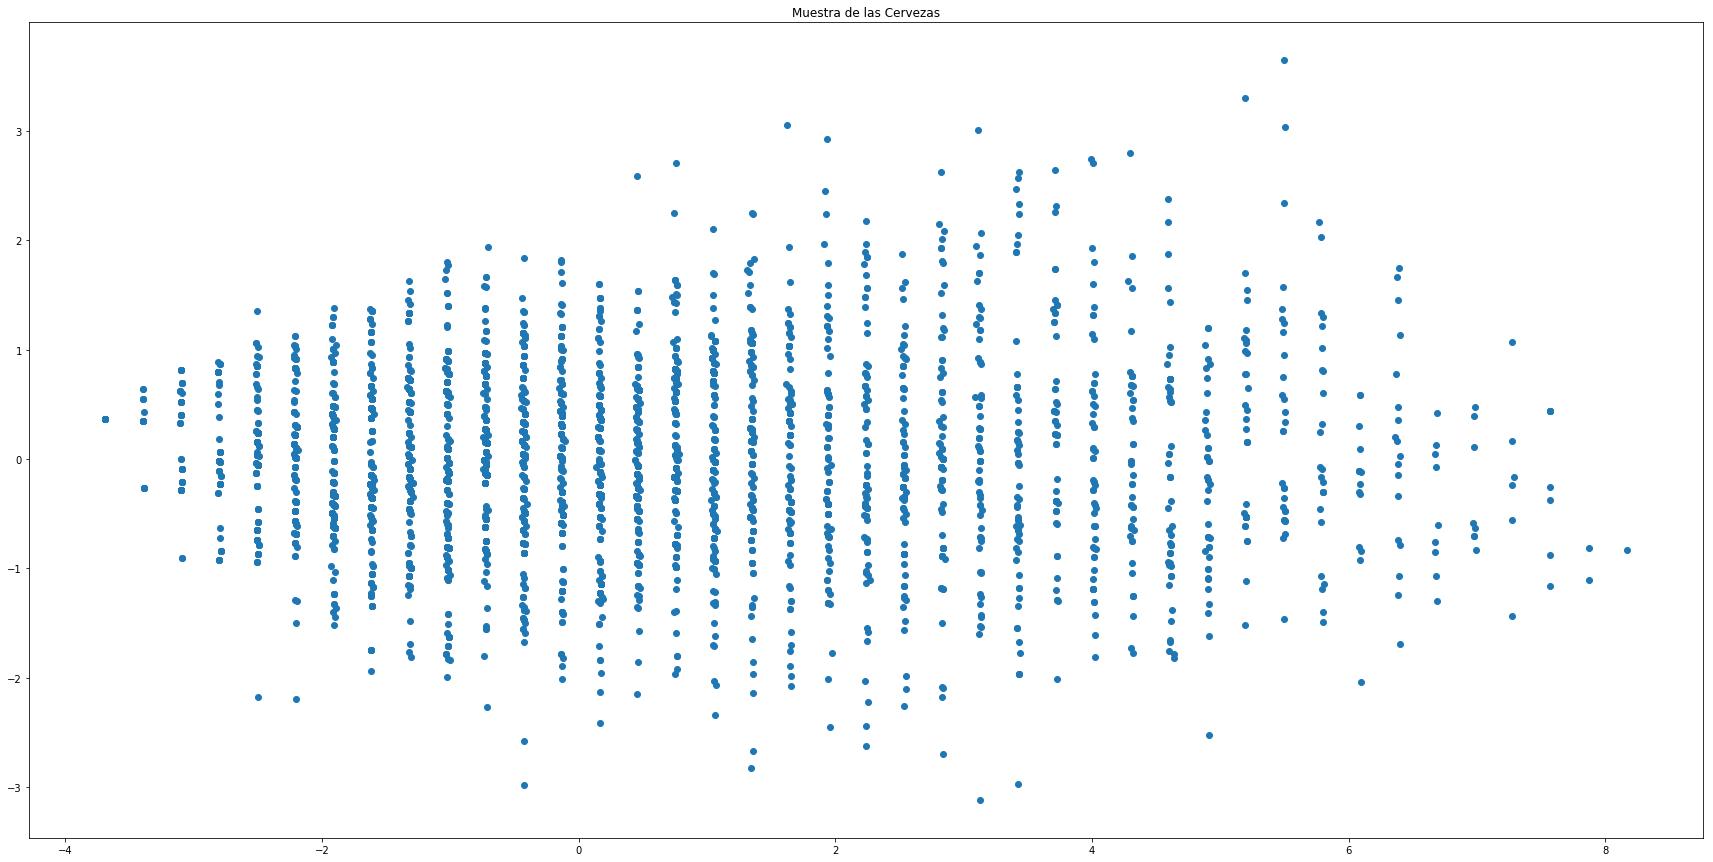

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
lista_reviews=[]
#0,review_overall
#1,review_aroma
#2,review_appearance
#3,review_palate
#4,review_taste

for beer in lista:
    lista_reviews.append([beer[2],beer[3],beer[4],beer[6],beer[7]])

scaledBeer = StandardScaler().fit_transform(lista_reviews)
pca = PCA(n_components=2)
pca.fit(scaledBeer)
scaledBeer2D = pca.transform(scaledBeer)
plt.figure(figsize=(30,15))
plt.scatter(scaledBeer2D[:,0], scaledBeer2D[:,1])
plt.title('Muestra de las Cervezas')
plt.show()

<p style="font-size:16px">
Como se puede notar, al muestrear el *Dataset*, cuesta más notar la tendencia que siguen los datos, por lo que idealmente no se debería muestrear, pero debido a las limitaciones de *Hardware* se obliga a trabajar un volumen muy reducido de datos.
</p>
<p style="font-size:16px">
A pesar de esto, se puede notar que existe una tendencia similar entre ambos gráficos, siendo evidente la baja concentración de datos en el segundo gráfico.
</p>

<strong style="font-size:18px">K-Means:</strong>
<p style="font-size:16px">
Kmeans en sí es un algoritmo de *clustering* el cual nos permite reducir la distancia *intraclustering* y maximizar la distancia *extraclustering*. Su funcionamiento se basa en cálculos de centroides e iteraraciones sobre este cálculo para determinar la mejor posición de los centroides, incluyendo a cada dato hacia el centroide más cercano.
</p>

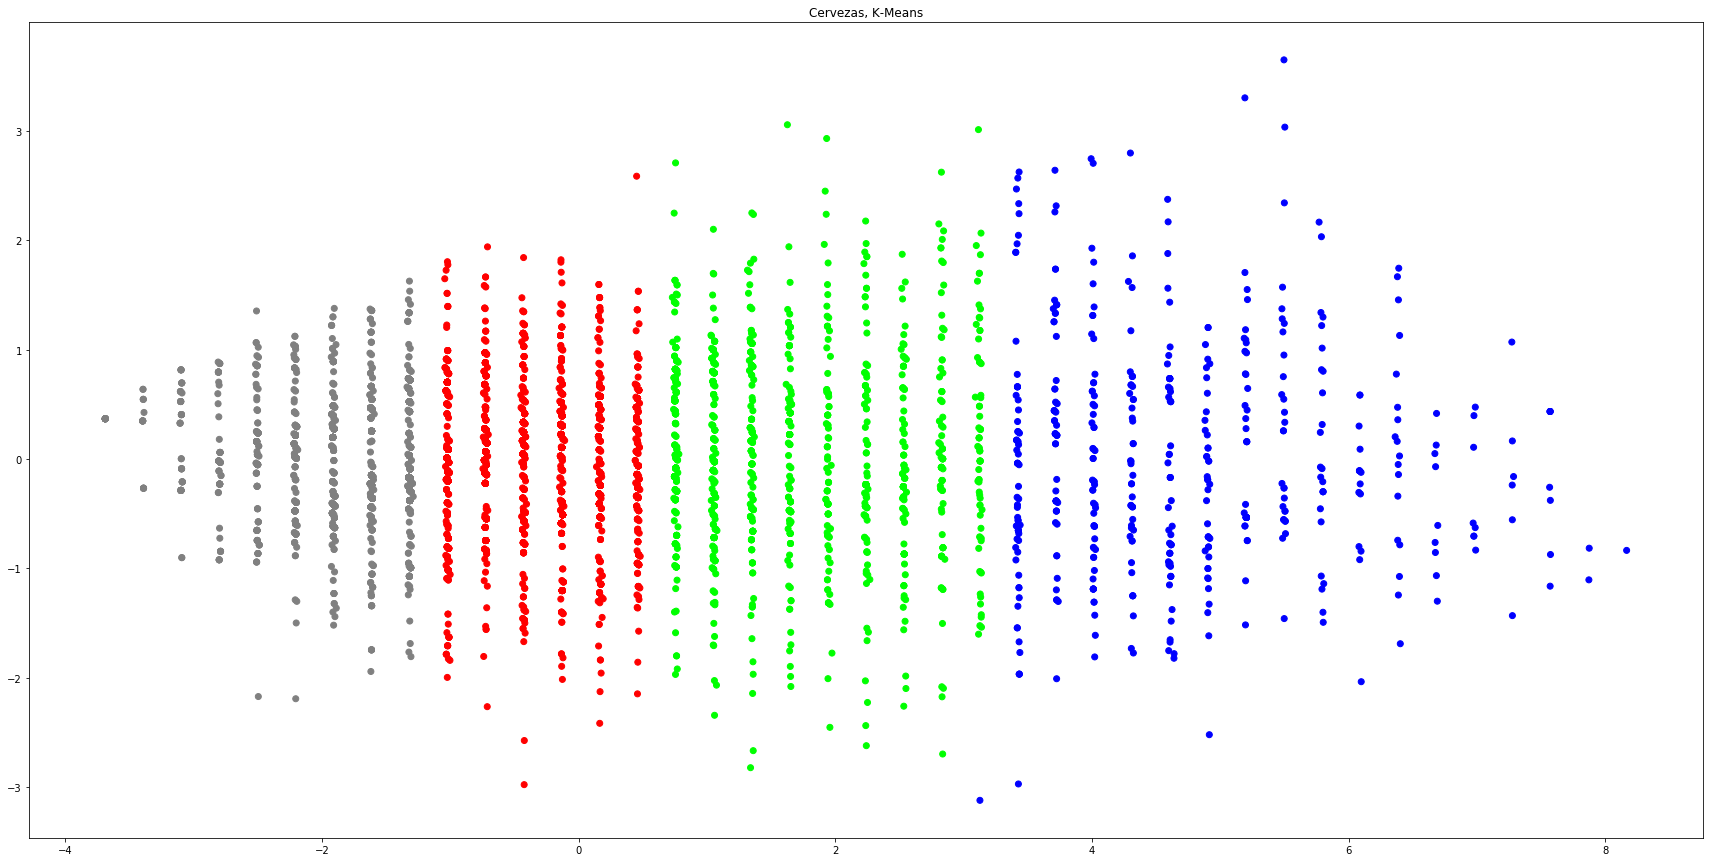

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaledBeer2D)
l_pred_kmeans= kmeans.labels_
colormap = np.array(['red', 'lime', 'blue','grey','yellow','brown','pink','black','purple','olive','emerald','crimson'])
plt.figure(figsize=(30,15))
plt.scatter(scaledBeer2D[:,0], scaledBeer2D[:,1], c=colormap[kmeans.labels_])
plt.title('Cervezas, K-Means')
plt.show()
#print l_pred_kmeans

<p style="font-size:16px">
Al aplicar Kmeans sobre la muestra se ajustó el parámetro K a 4 clusters (cantidad no conocida a priori) puesto que con un valor mayor, se notaban algunas irregularidades. Es decir, la tendencia que seguían los datos se veía afectaba asignando éstos a diferentes clusters.  
<p>
<p  style="font-size:16px">El resultado obtenido con esta configuración no correspondía al esperado, aunque podrían existir perfectamente más de 4 clusters. Con este valor los grupos eran claramente visibles mientras que con 5 o más, los clusters comenzaban a interponerse entre ellos generando divisiones diagonales. <p>
<p style="font-size:16px">Aún así, el resultado de este algoritmo depende del conjunto de datos a analizar.<p>

<strong style="font-size:18px">Minibatch K-Means:</strong>
<p style="font-size:16px">
Mininatch K-Means funciona similar a K-Means, pero en vez de calcular un solo dato y asignarlos al centroide más cercano, toma una submuestra y la asigna al centroide más cercano y vuelve a recalcular los centroides.
</p>

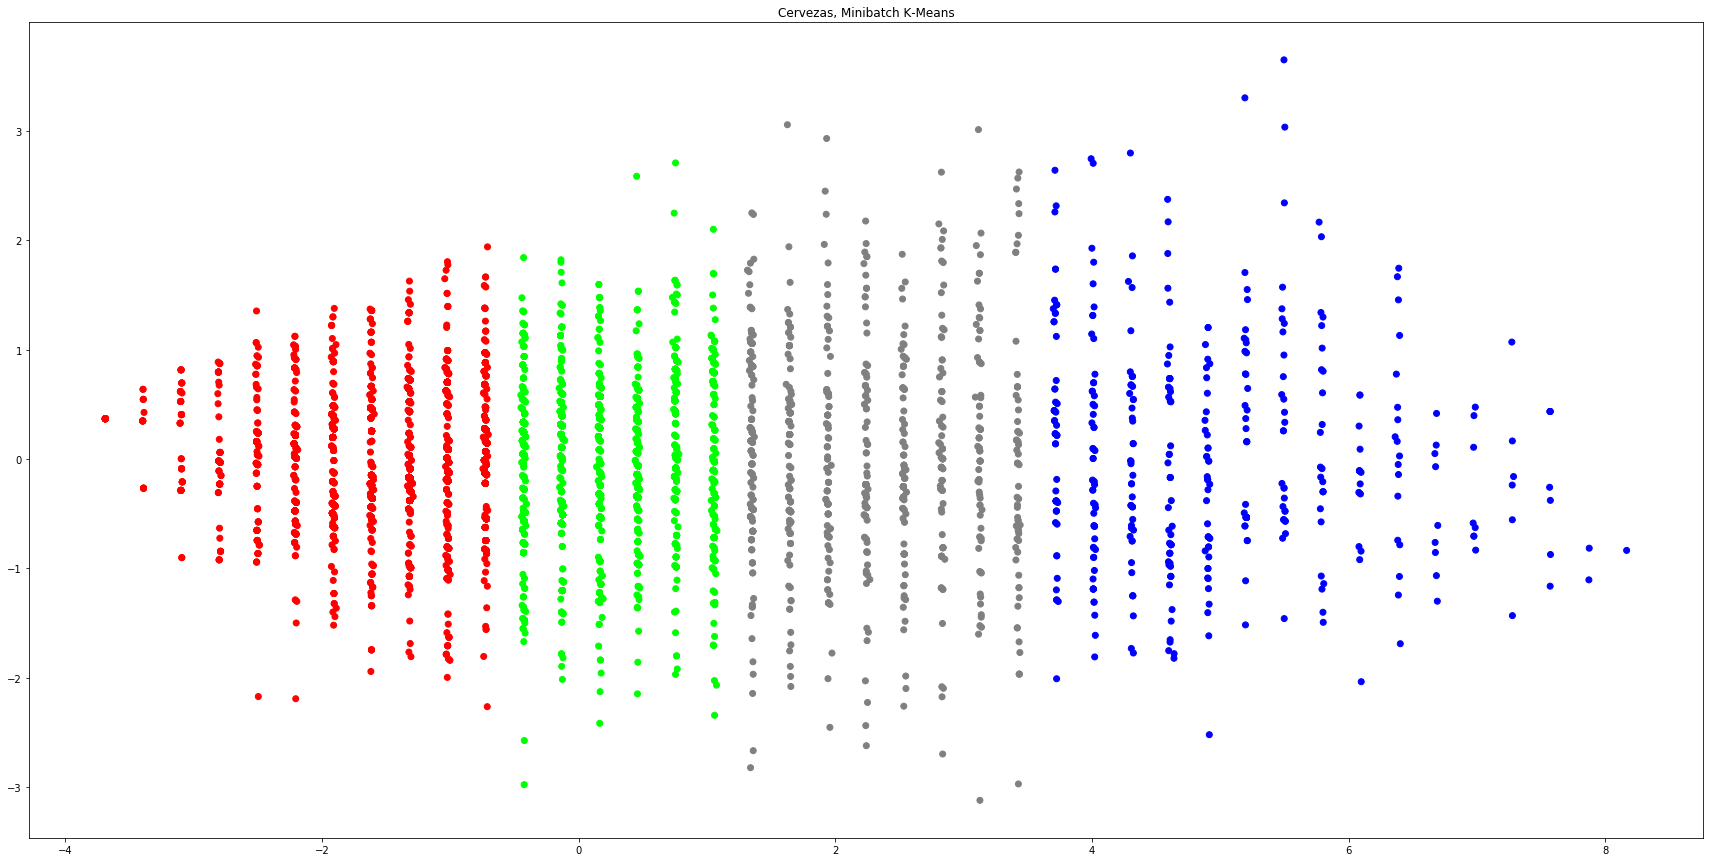

[2 3 3 ..., 1 1 1]


In [23]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
minikmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=100).fit(scaledBeer2D)
l_pred_mini= minikmeans.labels_
colormap = np.array(['red', 'lime', 'blue','grey','yellow','brown','pink','black','purple','olive','emerald','crimson'])
plt.figure(figsize=(30,15))
plt.scatter(scaledBeer2D[:,0], scaledBeer2D[:,1], c=colormap[minikmeans.labels_])
plt.title('Cervezas, Minibatch K-Means')
plt.show()
print(l_pred_mini)

Al igual que en el caso anterior al aumentar el número de clusters, los resultados obtenidos no eran los esperados, por lo que se mantuvo el valor de k en 4.  

Ahora bien, respecto al parámetro b (tamaño del batch) con un valor de 500, algunos datos se solapaban con otros clusters por lo que la visualización de los resulados no era correcta. De manera similar, ajustando el valor a uno mucho mayor (1000 o 3000) estos errores eran aún más notorios.   

Por lo anterior, se fijó el parámetro en 100 que justamente corresponde al valor por defecto para la definición del método y que refleja el comportamiento de los datos.  

Por otro lado, no se detectaron diferencias significativas respecto al tiempo de ejecución entre los métodos KMeans y Mini Batch KMeans

<strong style="font-size:18px">HAC Ward:</strong>

Este método aglomerativo jerarquico genera clusters a partir de la combinación de los dos clusters más cercanos.  

El algoritmo inicia considerando cada uno de los datos como un cluster y termina cuando detecta la existencia de uno solo. En particular, HAC de tipo Ward basa la unión de clusters minimizando la diferencia entre errores cuadráticos entre los clusters. 

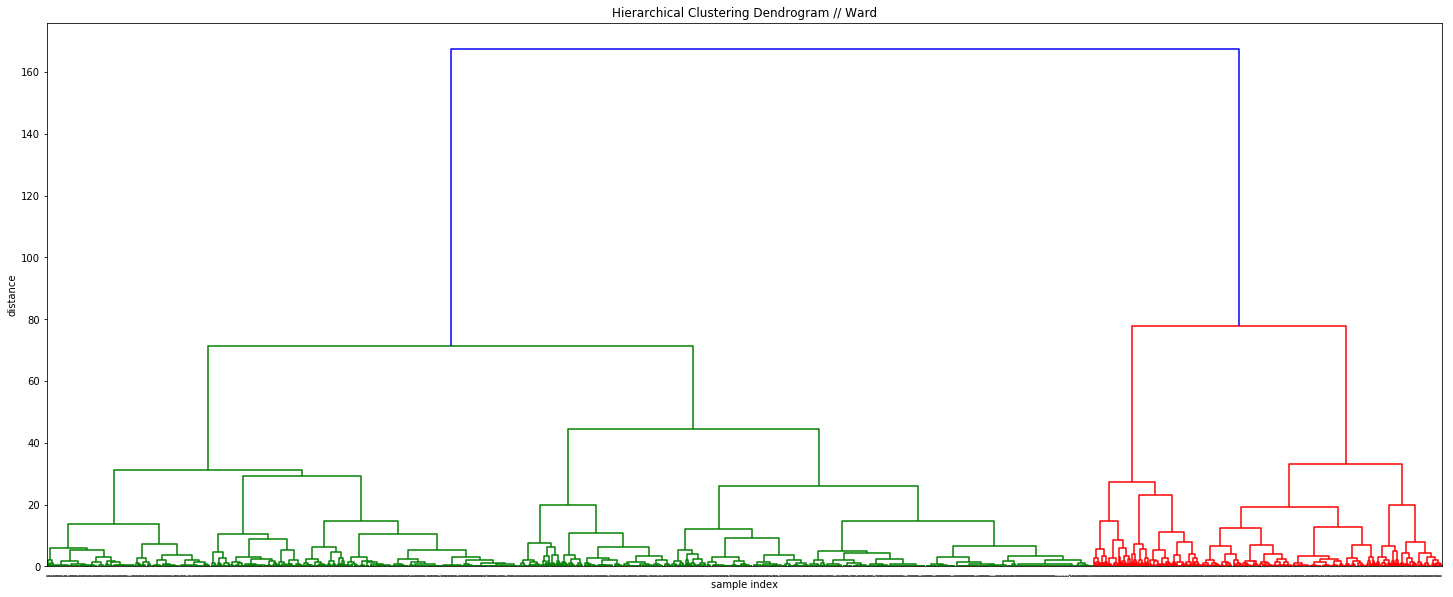

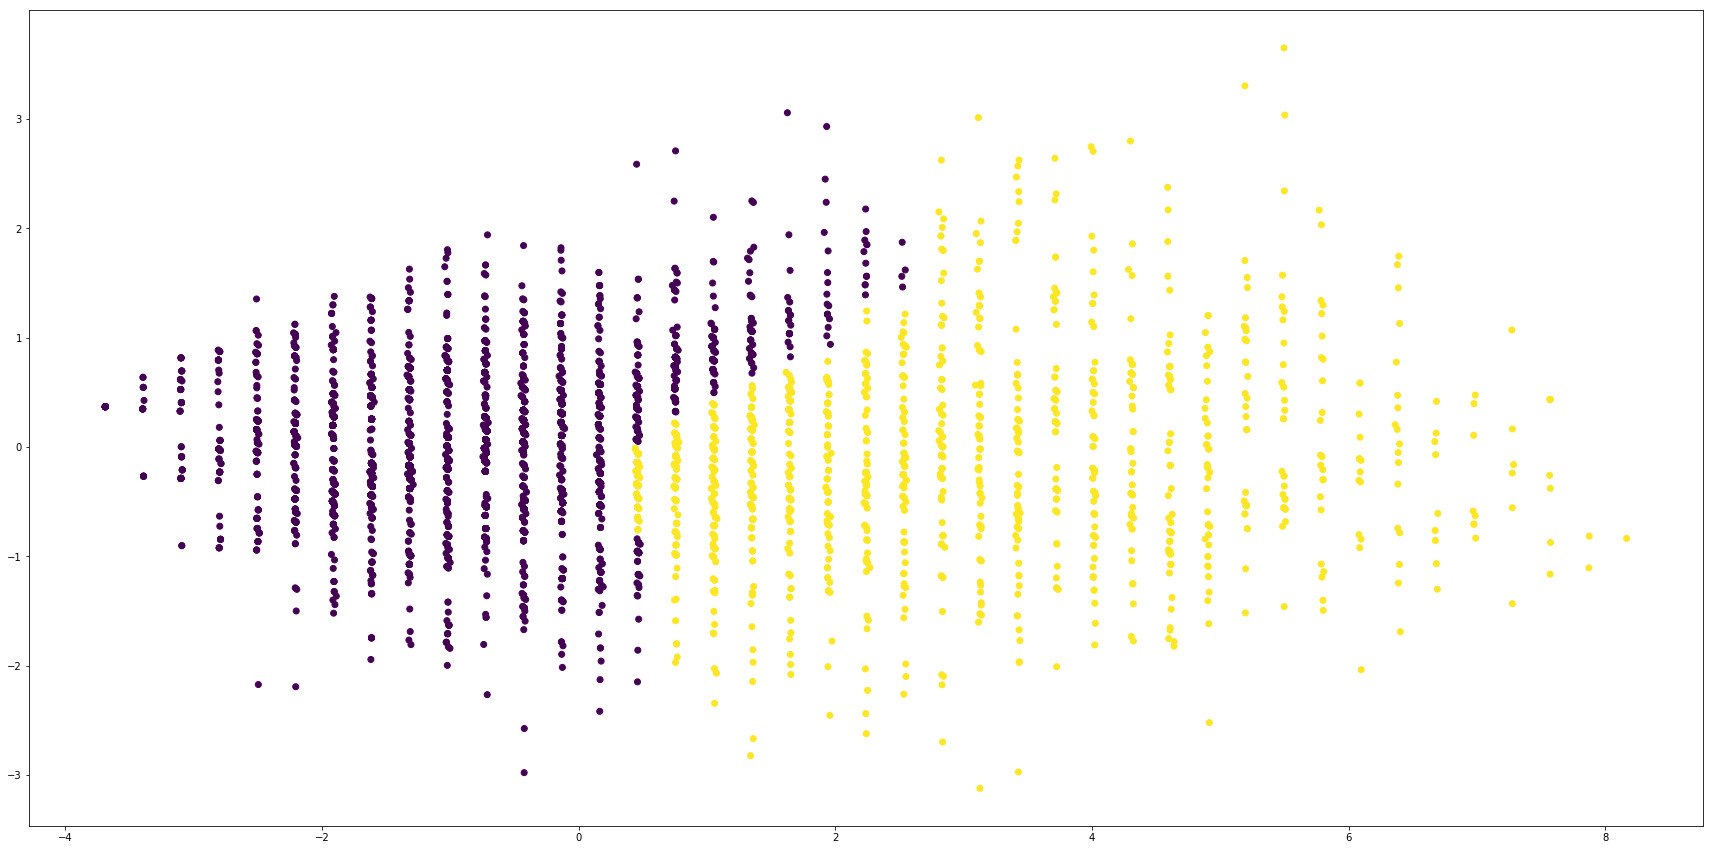

[2 2 2 ..., 1 1 2]


In [10]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
wardiola = linkage(scaledBeer2D, 'ward')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram // Ward')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    wardiola,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1.,  # font size for the x axis labels
)
plt.show()

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
l_pred_w = fcluster(wardiola, 2, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(scaledBeer2D[:,0],scaledBeer2D[:,1],c=l_pred_w)
plt.show()
print (l_pred_w)

A partir de la muestra considerada, HAC Ward retorna 2 clusters cuya representación gráfica (*scatterplot*) permite visualizar que la separación de los clusters se ondula. Esto se debe a que dicha configuración cumple con la condición que Ward establece sobre el error cuadrático.

<strong style="font-size:18px">HAC Completo:</strong>

De modo similar a HAC Ward, HAC Completo es un algoritmo jerárquico aglomerativo. Sin embargo, éste presenta una pequeña diferencia: la forma en que une los clusters.  
Para realizar la unión entre un cluster y otro, HAC Completo determina la mínima distancia entre ellos como la mayor distancia entre los datos que pertenecen a cada uno.

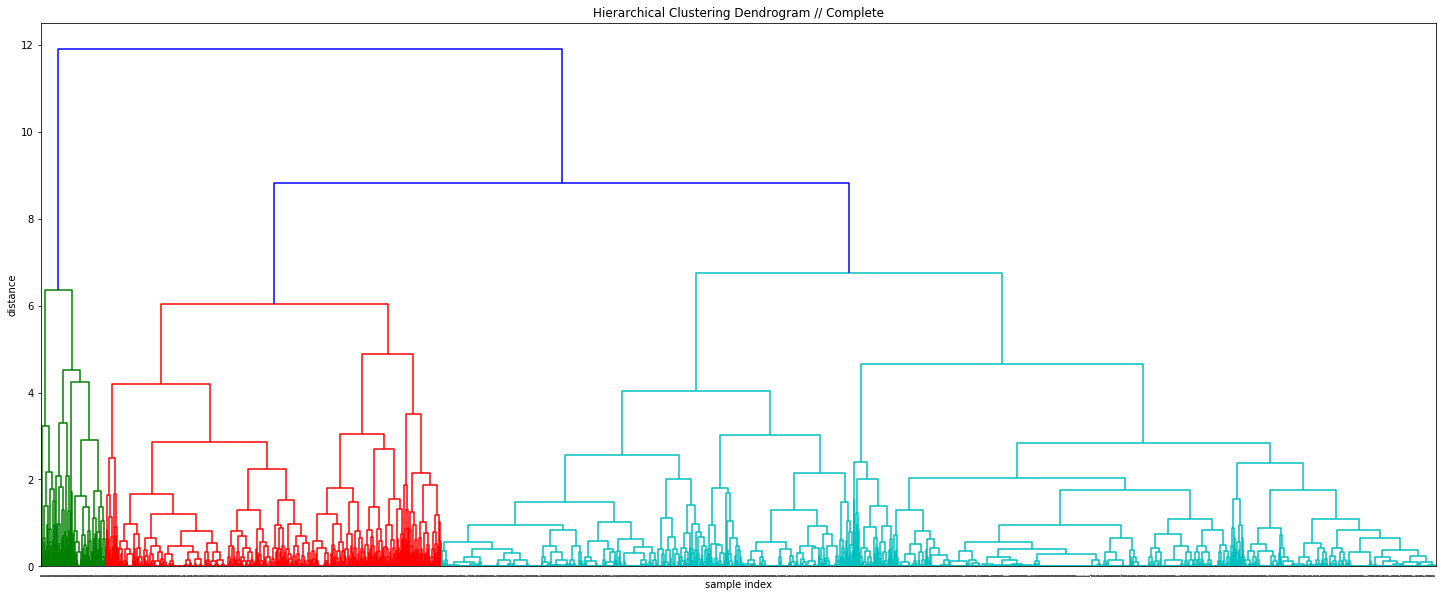

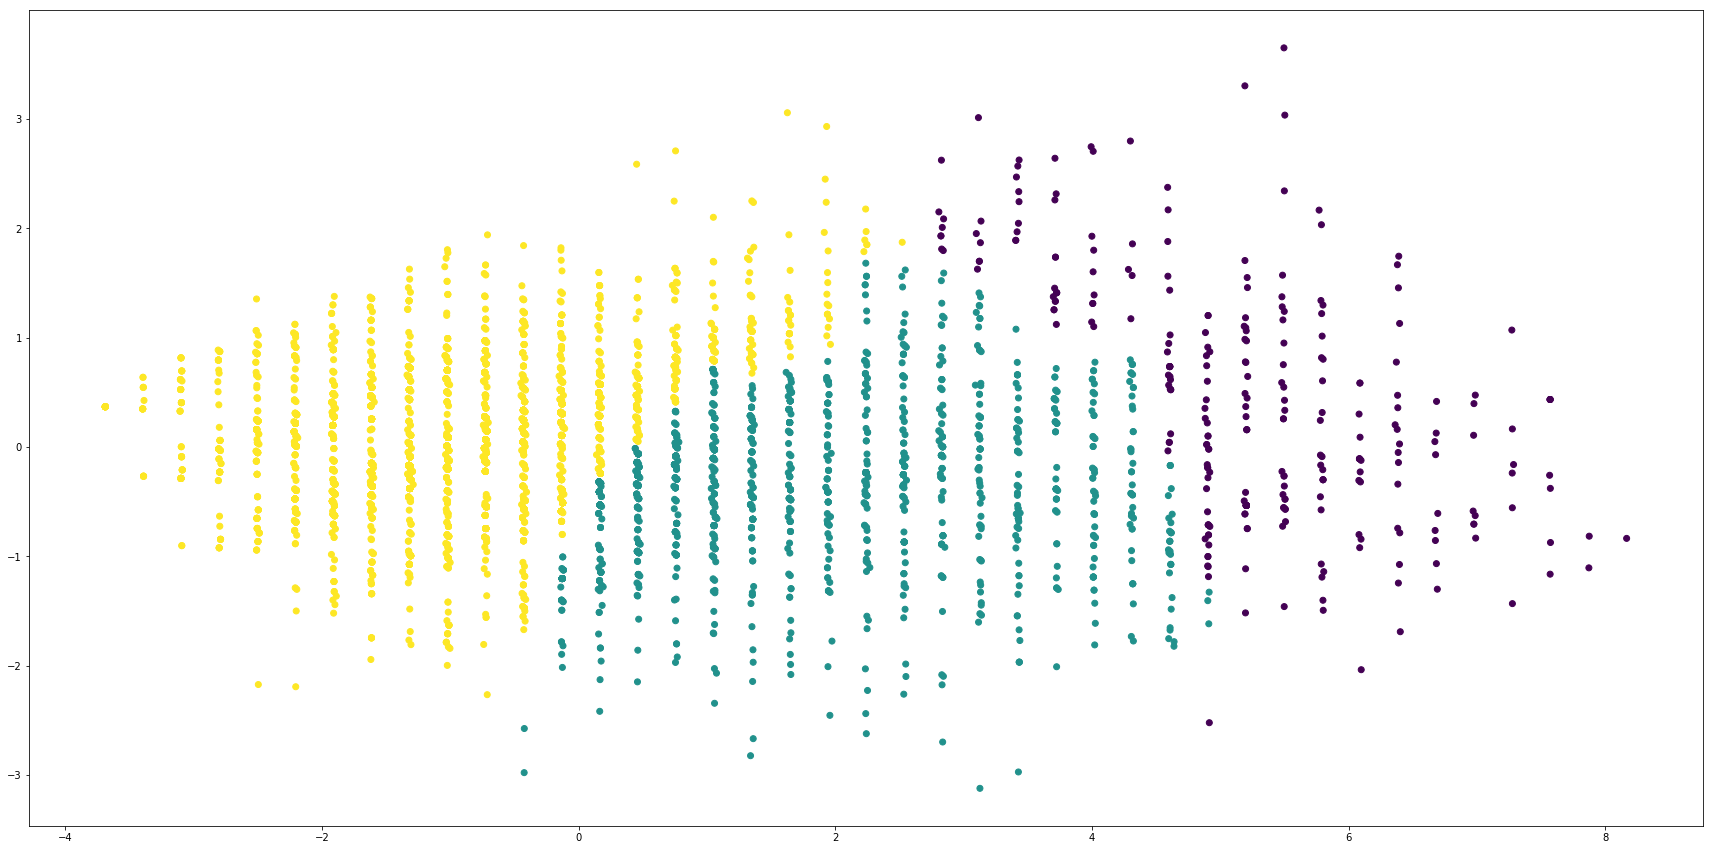

[1 2 2 ..., 3 3 2]


In [12]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
complete = linkage(scaledBeer2D,'complete')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram // Complete')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1.,  # font size for the x axis labels
)
plt.show()
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
l_pred_c = fcluster(complete, 3, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(scaledBeer2D[:,0],scaledBeer2D[:,1],c=l_pred_c)
plt.show()
print (l_pred_c)

Al igual que en el caso anterior, la manera en que se limitan los clusters representan la forma óptima que cumple el requisito de unión entre clusters. Siendo sólo 3 los clusters representativos de la muestra (lo que se puede apreciar fácilmente en el dendrograma).

<strong style="font-size:18px">DBSCAN</strong>

Este método determina la cantidad de clusters basándose en la densidad de los datos. Para esto utiliza dos parámetros: radio máximo y tamaño mínimo de vecindario del cluster.  
Básicamente, marca cada uno de los datos en 3 categorías:   
<li> núcleo: punto que cumple la condición de vecindario dentro de su radio. </li>
<li> borde: pertenece al vecindario de un núcleo pero no cumple con la condición de vecindario.</li>
<li> ruido: no es núcleo ni tampoco borde.</li>

[-1  0  0 ...,  4  4  8]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


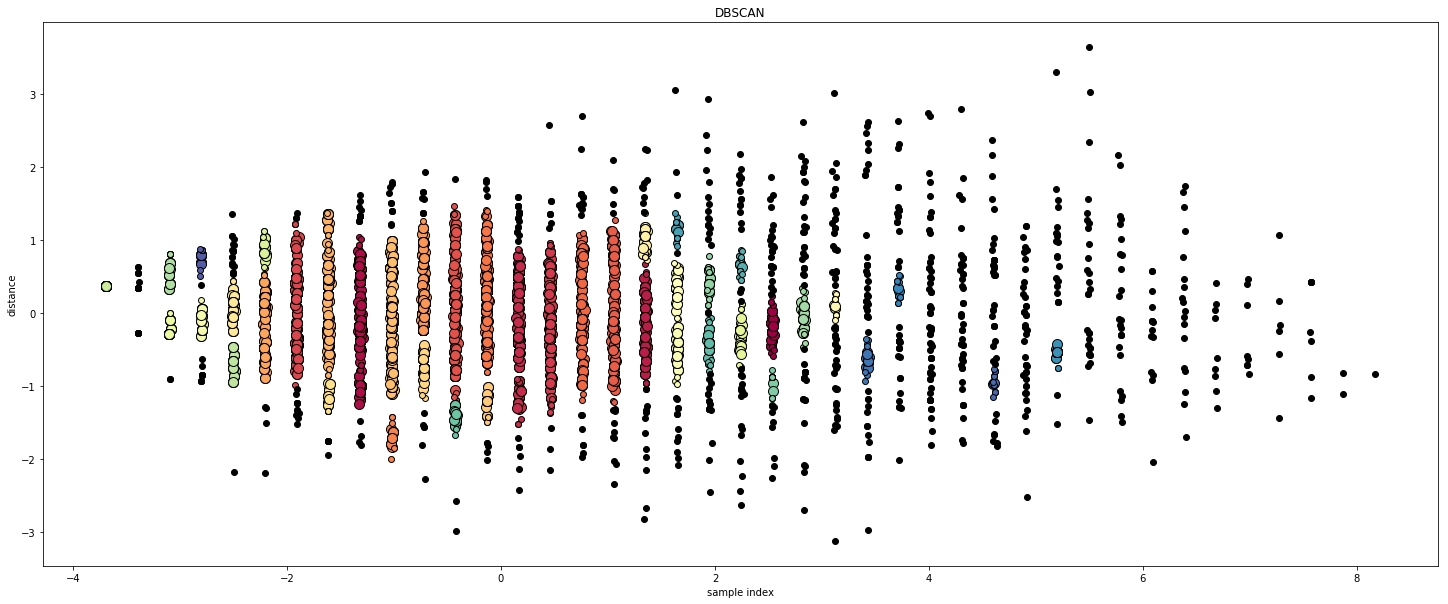

[-1  0  0 ...,  4  4  8]


In [15]:
import numpy, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
X=scaledBeer2D
db = DBSCAN(eps=0.2, min_samples=15).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

unique_labels = set(labels)
plt.figure(figsize=(25,10))
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()
l_pred_d = labels
print (l_pred_d)
del db
del core_samples_mask
del colors

Durante la sintonización de parámetros se determinó que el radio máximo debía ser 0.2 puesto que con un valor menor, los clusters se segregaban demasiado y con uno mayor, los datos convergían a uno sólo.  
Por otro lado, el tamaño mínimo de vecindario (que regula la cantidad de conjuntos a considerarse como cluster), si era muy pequeño se tendían a generar demasiados clusters. De manera contraria, cuando el valor era muy pequeño, muchos conjuntos se consideraban clusters. Por ello, mediante pruebas se determinó que el valor debía ser 15.

<strong style="font-size:18px">Evaluación de clustering</strong>

**Nombre de cervecerías**


In [34]:
import numpy, scipy, sklearn
from sklearn import metrics

#KMeans
RA= metrics.adjusted_rand_score(l_true_cervecerias, l_pred_kmeans)
NMI= metrics.normalized_mutual_info_score(l_true_cervecerias, l_pred_kmeans)
H= metrics.homogeneity_score(l_true_cervecerias, l_pred_kmeans)
C= metrics.completeness_score(l_true_cervecerias, l_pred_kmeans)
VM= metrics.v_measure_score(l_true_cervecerias, l_pred_kmeans)

print ("KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#MiniBatchKMeans
RA= metrics.adjusted_rand_score(l_true_cervecerias, l_pred_mini)
NMI= metrics.normalized_mutual_info_score(l_true_cervecerias, l_pred_mini)
H= metrics.homogeneity_score(l_true_cervecerias, l_pred_mini)
C= metrics.completeness_score(l_true_cervecerias, l_pred_mini)
VM= metrics.v_measure_score(l_true_cervecerias, l_pred_mini)

print ("Mini Batch KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#HAC Ward
RA= metrics.adjusted_rand_score(l_true_cervecerias, l_pred_w)
NMI= metrics.normalized_mutual_info_score(l_true_cervecerias, l_pred_w)
H= metrics.homogeneity_score(l_true_cervecerias, l_pred_w)
C= metrics.completeness_score(l_true_cervecerias, l_pred_w)
VM= metrics.v_measure_score(l_true_cervecerias, l_pred_w)

print ("HAC Ward")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)
print ("\n")

#HAC Complete
RA= metrics.adjusted_rand_score(l_true_cervecerias, l_pred_c)
NMI=metrics.normalized_mutual_info_score(l_true_cervecerias, l_pred_c)
H= metrics.homogeneity_score(l_true_cervecerias, l_pred_c)
C= metrics.completeness_score(l_true_cervecerias, l_pred_c)
VM= metrics.v_measure_score(l_true_cervecerias, l_pred_c)

print ("HAC Complete")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#DBSCAN
RA= metrics.adjusted_rand_score(l_true_cervecerias, l_pred_d)
NMI= metrics.normalized_mutual_info_score(l_true_cervecerias, l_pred_d)
H= metrics.homogeneity_score(l_true_cervecerias, l_pred_d)
C= metrics.completeness_score(l_true_cervecerias, l_pred_d)
VM= metrics.v_measure_score(l_true_cervecerias, l_pred_d)

print ("DBSCAN")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")


KMeans
0.0126391172709
0.156346588558
0.224190490911
0.109033419099
0.146713696222


Mini Batch KMeans
0.162493833808
0.149104201077
0.115827137514
0.191941744016
0.144472453929


HAC Ward
0.184450487321
0.154687340925
0.083168020513
0.287708824795
0.129035682573


HAC Complete
0.188158550583
0.146777769808
0.0897795072566
0.239962485518
0.130670125019


DBSCAN
0.0203935573445
0.129821011136
0.162359637135
0.103803477452
0.126640349536




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


Para el general de los algoritmos, la métrica que más destacó fue *Completness*, obteniendose el valor más alto para los HAC, en especifico *Ward*, esto quiere decir que la entropía condicional, H(C|K), es baja dentro de los resultados obtenidos para nombres de cervecerías.
Dado que la completitud de *ward* fue ~0.28 al comparar el atributo de nombres de cervecería se puede conlcuir que el 28% son asignados al mismo cluster de manera correcta.

**Tipo de cerveza**

In [32]:
#KMeans
RA= metrics.adjusted_rand_score(l_true_tipos, l_pred_kmeans)
NMI= metrics.normalized_mutual_info_score(l_true_tipos, l_pred_kmeans)
H= metrics.homogeneity_score(l_true_tipos, l_pred_kmeans)
C= metrics.completeness_score(l_true_tipos, l_pred_kmeans)
VM= metrics.v_measure_score(l_true_tipos, l_pred_kmeans)

print ("KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)


print ("\n")

#MiniBatchKMeans
RA= metrics.adjusted_rand_score(l_true_tipos, l_pred_mini)
NMI= metrics.normalized_mutual_info_score(l_true_tipos, l_pred_mini)
H= metrics.homogeneity_score(l_true_tipos, l_pred_mini)
C= metrics.completeness_score(l_true_tipos, l_pred_mini)
VM= metrics.v_measure_score(l_true_tipos, l_pred_mini)

print ("Mini Batch KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#HAC Ward
RA= metrics.adjusted_rand_score(l_true_tipos, l_pred_w)
NMI= metrics.normalized_mutual_info_score(l_true_tipos, l_pred_w)
H= metrics.homogeneity_score(l_true_tipos, l_pred_w)
C= metrics.completeness_score(l_true_tipos, l_pred_w)
VM= metrics.v_measure_score(l_true_tipos, l_pred_w)

print ("HAC Ward")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#HAC Complete
RA= metrics.adjusted_rand_score(l_true_tipos, l_pred_c)
NMI=metrics.normalized_mutual_info_score(l_true_tipos, l_pred_c)
H= metrics.homogeneity_score(l_true_tipos, l_pred_c)
C= metrics.completeness_score(l_true_tipos, l_pred_c)
VM= metrics.v_measure_score(l_true_tipos, l_pred_c)

print ("HAC Complete")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)


print ("\n")

#DBSCAN
RA= metrics.adjusted_rand_score(l_true_tipos, l_pred_d)
NMI= metrics.normalized_mutual_info_score(l_true_tipos, l_pred_d)
H= metrics.homogeneity_score(l_true_tipos, l_pred_d)
C= metrics.completeness_score(l_true_tipos, l_pred_d)
VM= metrics.v_measure_score(l_true_tipos, l_pred_d)

print ("DBSCAN")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")




KMeans
0.0275974133385
0.184385223802
0.213935296571
0.158916790738
0.182366744957


Mini Batch KMeans
0.134634915196
0.15463685608
0.0971988228268
0.246016943035
0.139344165606


HAC Ward
0.0901331245595
0.149213823249
0.0649139743329
0.342988782882
0.109167024025


HAC Complete
0.0971182016625
0.147067532558
0.0727882518704
0.297147665687
0.116933004373


DBSCAN
0.0481904640685
0.145801233364
0.147544094926
0.144078959319
0.145790940333




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


Una vez más el *complitness* fue el valor que más destacó en general para todos los algoritmos y además volvió a sobresalir en *ward*. De la misma manera se puede decir que el 34% de los datos fue asignado correctamente según el tipo de cerveza.

**Nombre de cervezas**



In [33]:
#KMeans
RA= metrics.adjusted_rand_score(l_true_nombres, l_pred_kmeans)
NMI= metrics.normalized_mutual_info_score(l_true_nombres, l_pred_kmeans)
H= metrics.homogeneity_score(l_true_nombres, l_pred_kmeans)
C= metrics.completeness_score(l_true_nombres, l_pred_kmeans)
VM= metrics.v_measure_score(l_true_nombres, l_pred_kmeans)

print ("KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#MiniBatchKMeans
RA= metrics.adjusted_rand_score(l_true_nombres, l_pred_mini)
NMI= metrics.normalized_mutual_info_score(l_true_nombres, l_pred_mini)
H= metrics.homogeneity_score(l_true_nombres, l_pred_mini)
C= metrics.completeness_score(l_true_nombres, l_pred_mini)
VM= metrics.v_measure_score(l_true_nombres, l_pred_mini)

print ("Mini Batch KMeans")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#HAC Ward
RA= metrics.adjusted_rand_score(l_true_nombres, l_pred_w)
NMI= metrics.normalized_mutual_info_score(l_true_nombres, l_pred_w)
H= metrics.homogeneity_score(l_true_nombres, l_pred_w)
C= metrics.completeness_score(l_true_nombres, l_pred_w)
VM= metrics.v_measure_score(l_true_nombres, l_pred_w)

print ("HAC Ward")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#HAC Complete
RA= metrics.adjusted_rand_score(l_true_nombres, l_pred_c)
NMI=metrics.normalized_mutual_info_score(l_true_nombres, l_pred_c)
H= metrics.homogeneity_score(l_true_nombres, l_pred_c)
C= metrics.completeness_score(l_true_nombres, l_pred_c)
VM= metrics.v_measure_score(l_true_nombres, l_pred_c)

print ("HAC Complete")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")

#DBSCAN
RA= metrics.adjusted_rand_score(l_true_nombres, l_pred_d)
NMI= metrics.normalized_mutual_info_score(l_true_nombres, l_pred_d)
H= metrics.homogeneity_score(l_true_nombres, l_pred_d)
C= metrics.completeness_score(l_true_nombres, l_pred_d)
VM= metrics.v_measure_score(l_true_nombres, l_pred_d)

print ("DBSCAN")
print (RA)
print (NMI)
print (H)
print (C)
print (VM)

print ("\n")




KMeans
0.0235249093902
0.26549082961
0.261413817625
0.269631426707
0.265459040861


Mini Batch KMeans
0.0593717262409
0.182455813015
0.0973258901286
0.342047975714
0.151534382407


HAC Ward
0.0379537199604
0.161337509343
0.0595644554277
0.437002096873
0.104839086726


HAC Complete
0.0369111683612
0.168034032928
0.0705771992746
0.400064560682
0.119986956638


DBSCAN
0.0545493141627
0.213654784749
0.183483047265
0.248787927423
0.211202554505




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


De la misma manera *complitness* sobresalió en todo y además se destaco en *ward* por lo que el 43% de los datos quedan correctamente identificados por el nombre de la cerveza.



De esto se puede concluir que la mejor manera de marcar los datos sería con el **nombre de la cerveza**.